# Questão 1

Utilize redes neurais perceptron de múltiplas camadas para aproximar as funções abaixo. Apresente um gráfico com a curva da função analítica e a curva da função aproximada pela rede neural. Apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação. Procure definir para cada função a arquitetura da rede neural perceptron, isto é, o número de entradas, o número de neurônios em cada camada e o número de neurônios camada de saída.

## Letra a

$f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2$, onde $-10 \leq x_1 \leq 10, -10 \leq x_2 \leq 10$

### Importação de bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

### Organizando a função

In [ ]:
def f(x1, x2):
  result = (1 - x1)**2 + 100*((x2 - x1**2)**2)
  return result

### Plotando a superfície da função

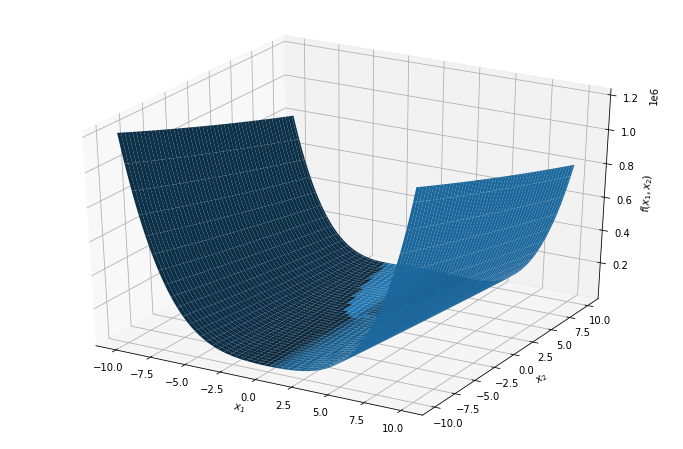

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z = f(x1, x2)

ax.plot_surface(x1, x2, z)
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)
plt.show()

### Separando dados de treino e teste

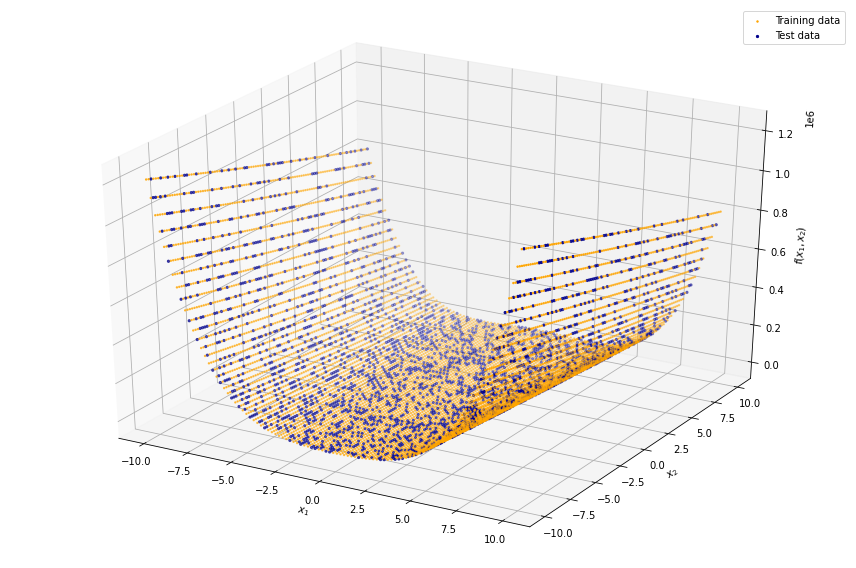

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.3, 
    random_state=33
)

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='3d'))
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=2, color='orange', label='Training data')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=5, color='darkblue', label='Test data')
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

### Projetando a MLP

In [ ]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               384       
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


### Treinando a MLP

In [ ]:
history = mlp.fit(
    X_train, y_train,
    batch_size=8,
    epochs=50,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

### Plotando a curva do erro médio de treinamento e validação

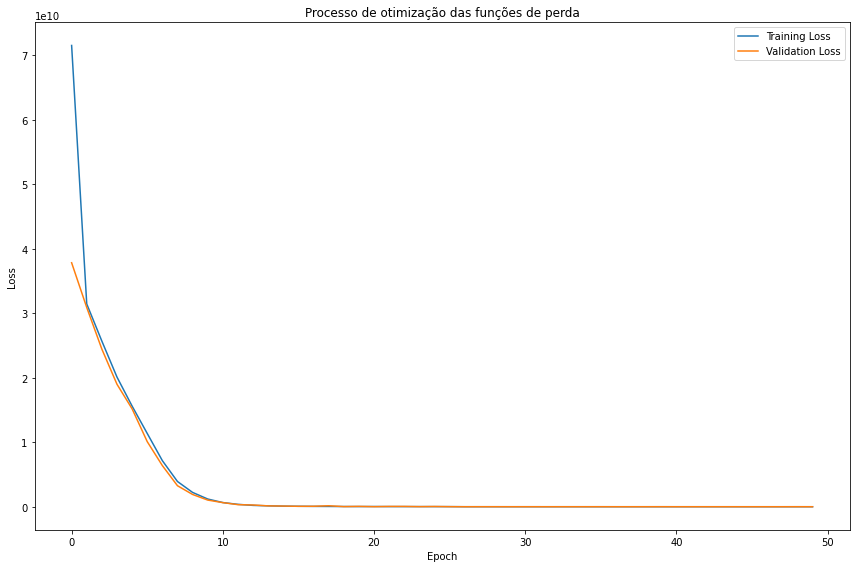

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

### Valores reais x valores previstos

94/94 [==============================] - 0s 1ms/step


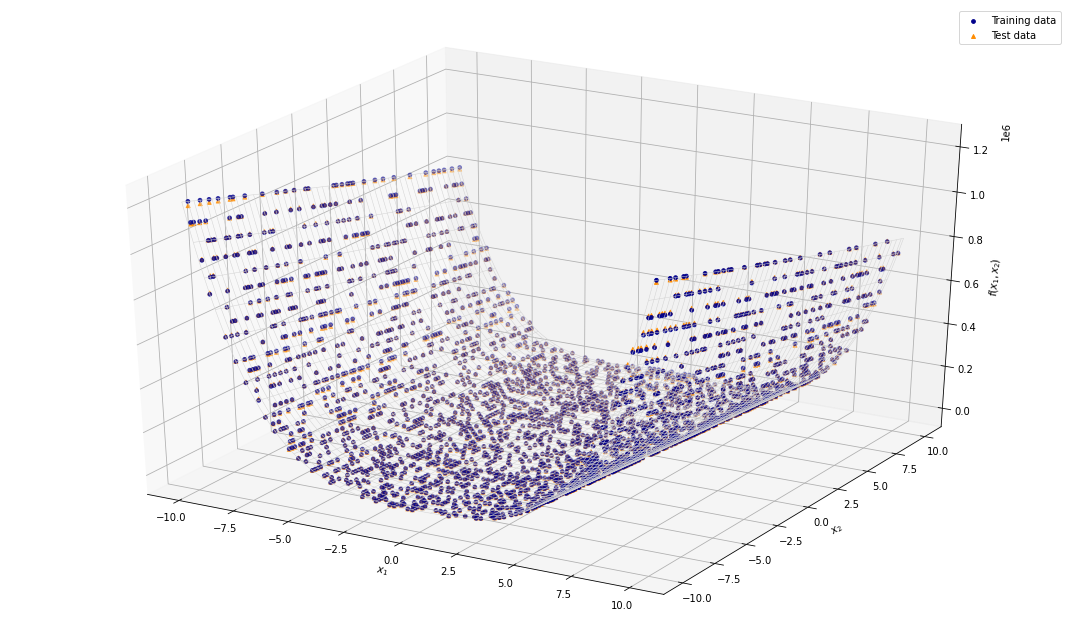

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

y_pred = mlp.predict(X_test)

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=14, color='darkblue', label='Training data')
ax.scatter(X_test[:,0], X_test[:,1], y_pred, s=15, marker='^', color='darkorange', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

## Letra b

$f(x_1, x_2) = x_1^2 + x_2^2 + 2x_1x_2cos(πx_1x_2) + x_1 + x_2 - 1$, onde $|x_1| \leq 1, |x_2| \leq 1$

### Importação de bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

### Organizando a função

In [ ]:
def f(x1, x2):
  result = x1**2 + x2**2 + 2*x1*x2*np.cos(np.pi*x1*x2) + x1 + x2 - 1
  return result

### Plotando a superfície da função

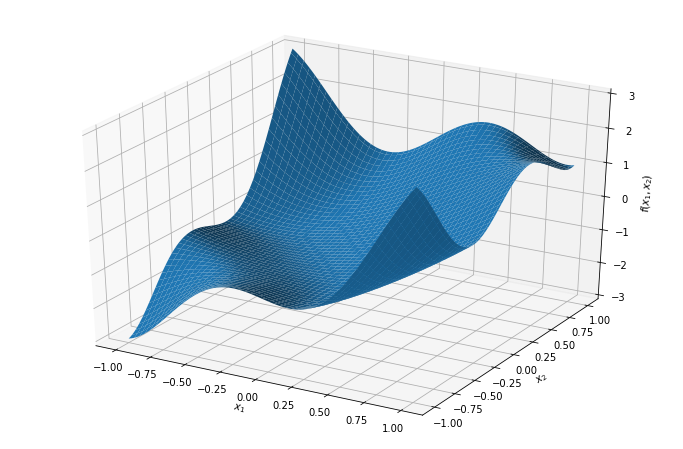

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z = f(x1, x2)

ax.plot_surface(x1, x2, z)
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)
plt.show()

### Separando dados de treino e teste

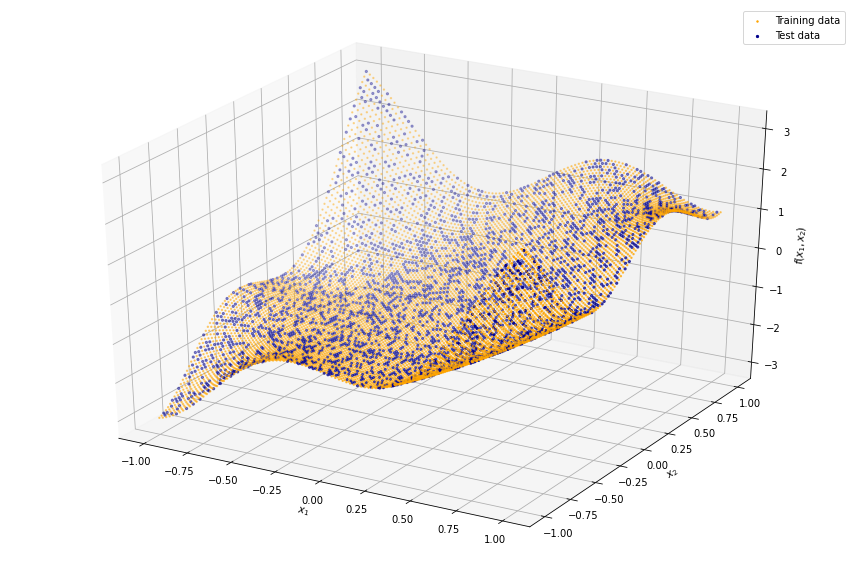

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.3, 
    random_state=33
)

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='3d'))
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=2, color='orange', label='Training data')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=5, color='darkblue', label='Test data')
ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

### Projetando a MLP

In [ ]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               384       
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


### Treinando a MLP

In [ ]:
history = mlp.fit(
    X_train, y_train,
    batch_size=8,
    epochs=50,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

### Plotando a curva do erro médio de treinamento e validação

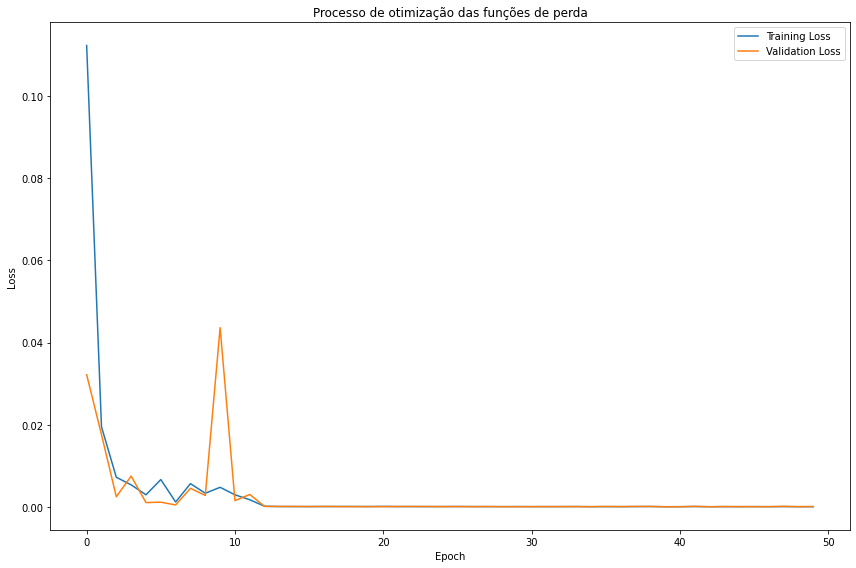

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

### Valores reais x valores preditos

94/94 [==============================] - 0s 2ms/step


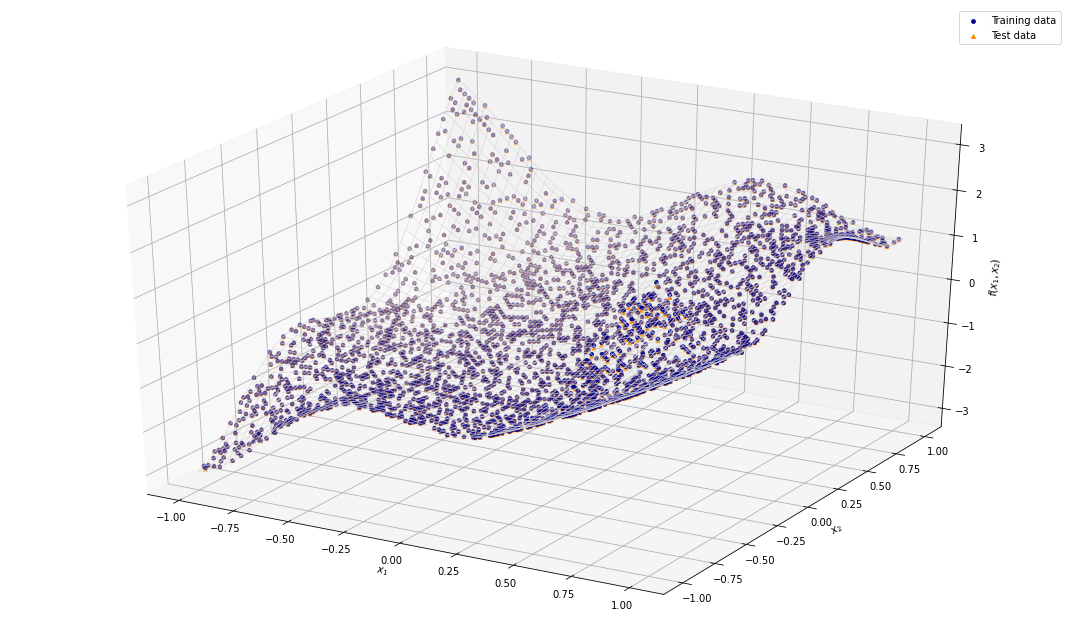

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

y_pred = mlp.predict(X_test)

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=14, color='darkblue', label='Training data')
ax.scatter(X_test[:,0], X_test[:,1], y_pred, s=15, marker='^', color='darkorange', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

# Questão 2

Considere o problema de classificação de padrões bidimensionais constituído neste caso
de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na origem
interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada eixo são
centros de quatro semicírculos que se interceptam no interior do quadrado originando as
classes 1,2,3,4 e a outra classe corresponde as regiões de não interseção. Após gerar aleatoriamente os dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação com o rótulo de cada classe. Solucione este
problema considerando uma rede perceptron de múltiplas camada. Apresente na solução a
curva do erro médio de treinamento e a curva do erro médio de teste. Apresente também a
matriz de confusão. 

### Bibliotecas

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Definindo as equações para cada semicírculo

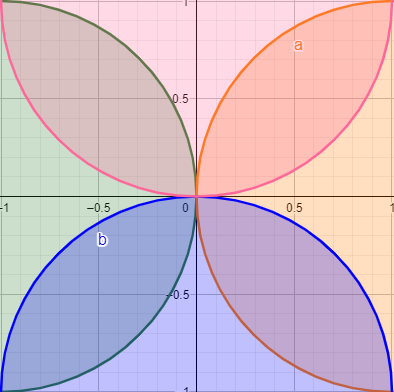

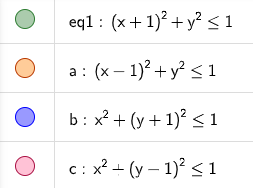

In [ ]:
# Semicírculo verde
def c1(x, y):
    if (x + 1)**2 + y**2 <= 1:
      return 1
    else:
      return 0

#Sermicírculo laranja
def c2(x, y):
    if (x - 1)**2 + y**2 <= 1:
      return 1
    else:
      return 0

#Semicírculo azul
def c3(x, y):
    if x**2 + (y + 1)**2 <= 1:
      return 1
    else:
      return 0

#Semicírculo rosa
def c4(x, y):
    if x**2 + (y - 1)**2 <= 1:
      return 1
    else:
      return 0

### Classificando os pontos 

*   Classe 0: região de fora
*   Classe 1: região dentro dos semicírculos rosa e verde
*   Classe 2: região dentro dos semicírculos laranja e rosa
*   Classe 3: região dentro dos semicírculos azul e laranja
*   Classe 4: região dentro dos semicírculos verde e azul





In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

points = np.vstack(list(zip(x.ravel(), y.ravel())))

lista = []
for x_i, y_i in points:
  if c1(x_i, y_i) + c4(x_i, y_i) == 2:
    lista.append(1)
  elif c2(x_i, y_i) + c4(x_i, y_i) == 2:
    lista.append(2)
  elif c2(x_i, y_i) + c3(x_i, y_i) == 2:
    lista.append(3)
  elif c1(x_i, y_i) + c3(x_i, y_i) == 2:
    lista.append(4)
  else:
    lista.append(0)

labels = np.array(lista)

### Dividindo dados de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.25, stratify=labels)

### Observando graficamente os dados de treino e teste

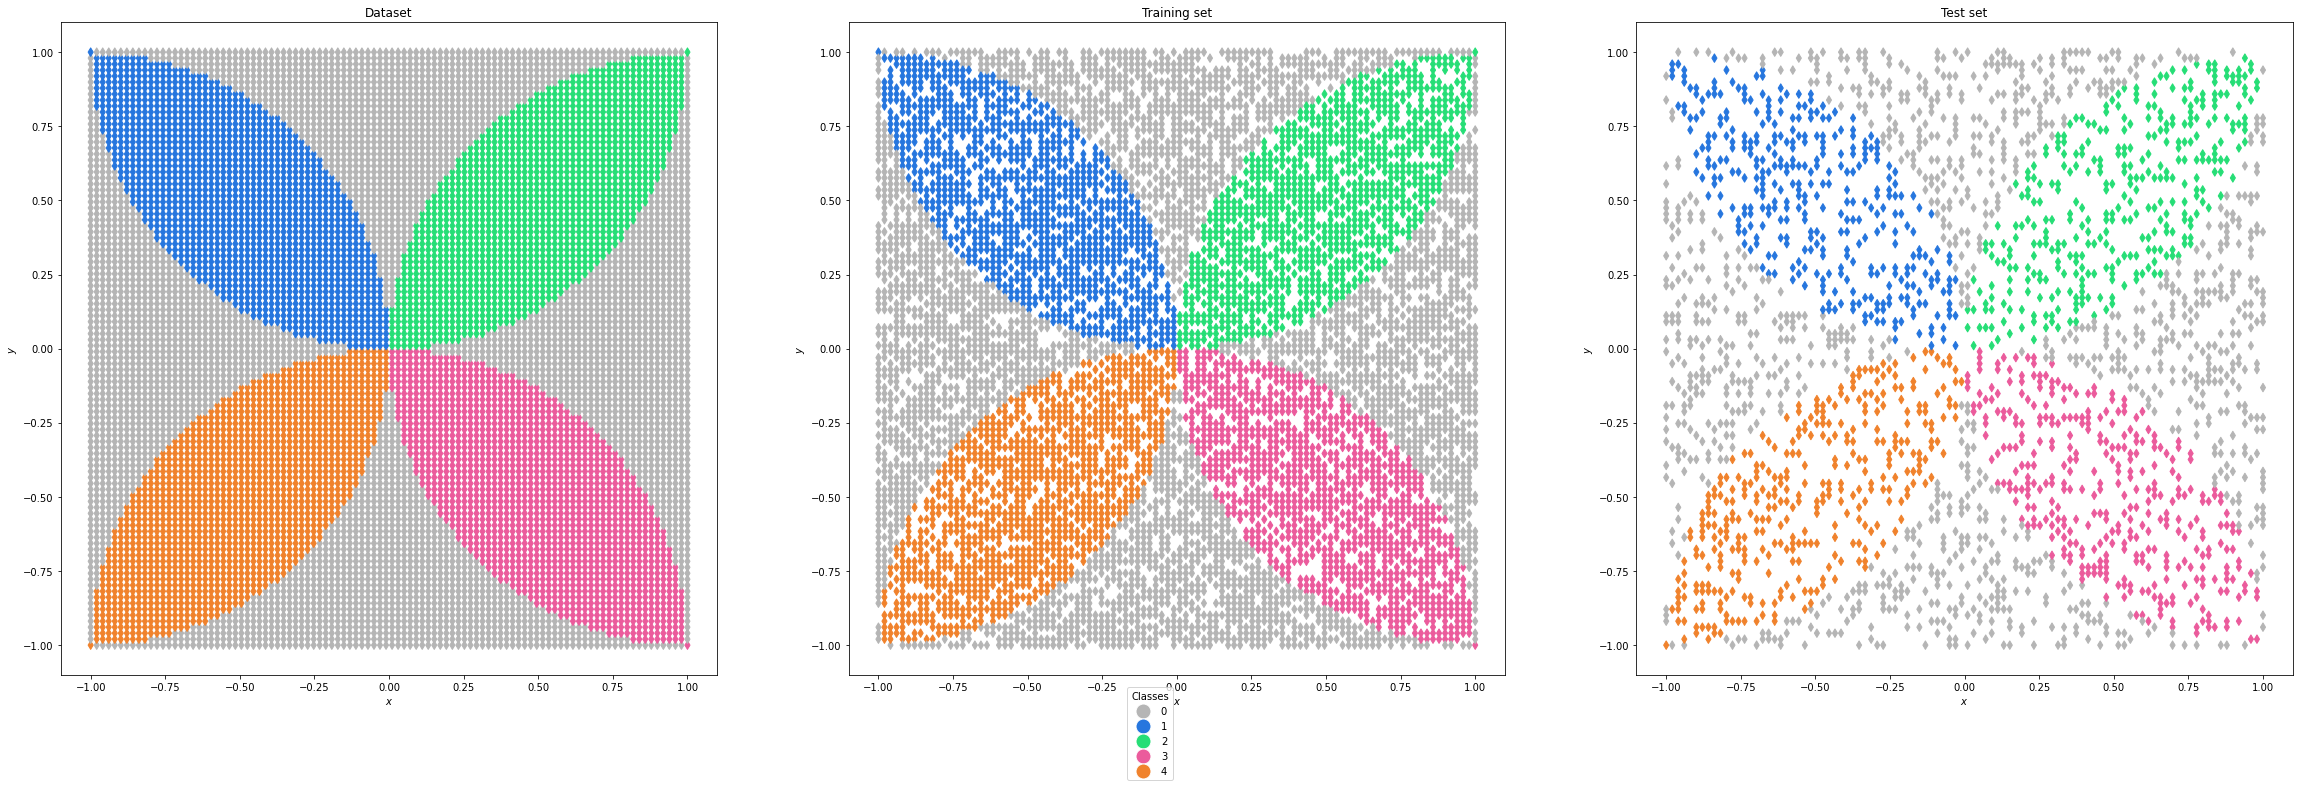

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(40, 12))

color1 = (181/255, 181/255, 181/255, 1.0)
color2 = (38/255, 118/255, 222/255, 1.0)
color3 = (38/255, 222/255, 118/255, 1.0)
color4 = (235/255, 91/255, 156/255, 1.0)
color5 = (240/255, 130/255, 44/255, 1.0)

colormap = np.array([color1, color2, color3, color4, color5])

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=colormap[labels], marker='d')

ax[0].set(
    title='Dataset',
    xlabel='$x$',
    ylabel='$y$'
)

ax[1].scatter(X_train[:,0], X_train[:,1], c=colormap[y_train], marker='d')

ax[1].set(
    title='Training set',
    xlabel='$x$',
    ylabel='$y$'
)

ax[2].scatter(X_test[:,0], X_test[:,1], c=colormap[y_test], marker='d')

ax[2].set(
    title='Test set',
    xlabel='$x$',
    ylabel='$y$'
)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(181/255, 181/255, 181/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 118/255, 222/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 222/255, 118/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(235/255, 91/255, 156/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(240/255, 130/255, 44/255), markersize=15)
]

fig.legend(
    legend_elements,
    ['0', '1', '2', '3', '4'],
    loc='lower center',
    title='Classes'
)

plt.show()

### Projetando a MLP

In [ ]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

mlp.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

### Treinando a rede

In [ ]:
history = mlp.fit(
    X_train, y_train,
    batch_size=8,
    epochs=20,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

### Curva de erro e curva de acurácia- Treinamento x validação

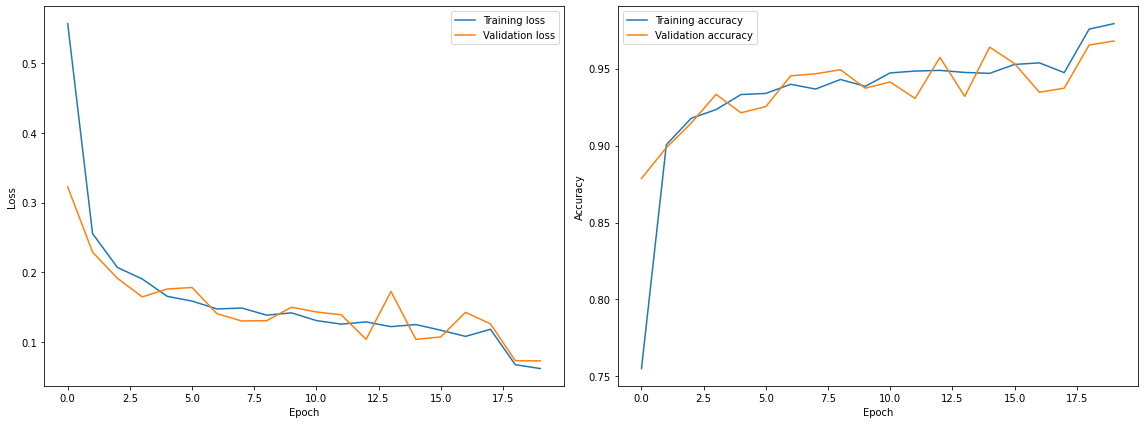

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

### Previsões, classification report e matriz de confusão

In [ ]:
y_pred = [ np.argmax(pred) for pred in mlp.predict(X_test) ]

79/79 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1104
           1       0.98      0.98      0.98       349
           2       0.98      0.98      0.98       349
           3       0.96      0.99      0.97       349
           4       0.99      0.96      0.98       349

    accuracy                           0.97      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.97      0.97      0.97      2500



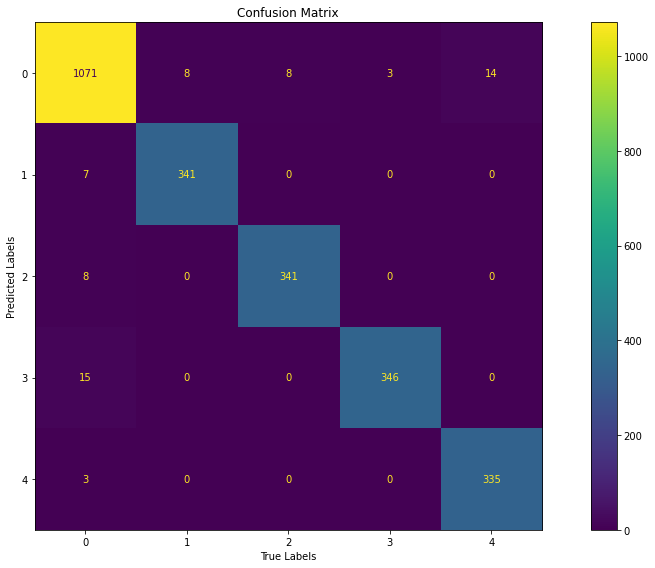

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.tight_layout()
plt.show()

# Questão 3

Considere uma rede deep learning convolutiva (treinada) aplicada à classificação de 
padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A referida 
base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino 
e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas 
um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto. Apresente os resultados da classificação em uma 
matriz de confusão.

https://www.cs.toronto.edu/~kriz/cifar.html

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data


### Importação de bibliotecas

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Leitura da base de dados

In [ ]:
data = tf.keras.datasets.cifar10.load_data()
data

### Divisão em dados de treino e teste

In [ ]:
(X_train, y_train), (X_test, y_test) = data
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

### Mostrando alguns exemplos de imagens

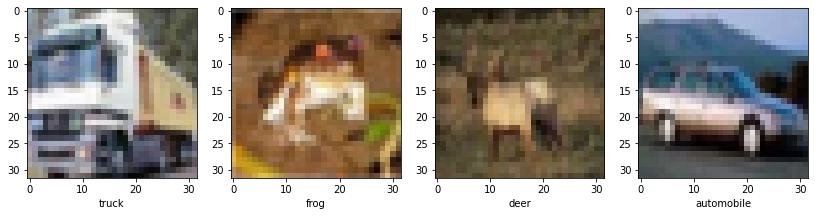

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, ax = plt.subplots(1, 4, figsize=(14, 14))
ax[0].imshow(X_train[1]); ax[0].set_xlabel(classes[int(y_train[1])])
ax[1].imshow(X_train[0]); ax[1].set_xlabel(classes[int(y_train[0])])
ax[2].imshow(X_train[3]); ax[2].set_xlabel(classes[int(y_train[3])])
ax[3].imshow(X_train[4]); ax[3].set_xlabel(classes[int(y_train[4])]);

### Normalizando os valores dos pixels

Vão de 0 a 1 ao invés de 0 a 255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Aplicando a técnica de Transfer Learning

Uso de uma rede neural já treinada, a ResNet50

A estratégia utilizada foi a seguinte: primeiro, treinou-se toda a arquitetura por uma pequena quantidade de época, e em seguida, deixou-se apenas o modelo de classificação treinando 

In [ ]:
resnet50 = tf.keras.applications.ResNet50(
                   include_top=False,
                   input_shape=(32,32,3),
                   weights='imagenet')

for layer in resnet50.layers:
  layer.trainable = True

X = resnet50.output
X = Flatten()(X)

X = Dense(512)(X)
X = Dropout(0.3)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(128)(X)
X = Dropout(0.3)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(32)(X)
X = Dropout(0.2)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(10, activation='softmax')(X)

final_model = tf.keras.Model(inputs = resnet50.inputs, outputs=output)

final_model.compile(
               optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)]

history1 = final_model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=10,
    shuffle=True,
    callbacks=cbs)

In [ ]:
for layer in final_model.layers:
  layer.trainable = False

for layer in final_model.layers[150:]:
  layer.trainable = True

final_model.compile(
               optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
cbs2 = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001), tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

history2 = final_model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=20,
    shuffle=True,
    callbacks = cbs2 
)

### Gráficos de acurácia

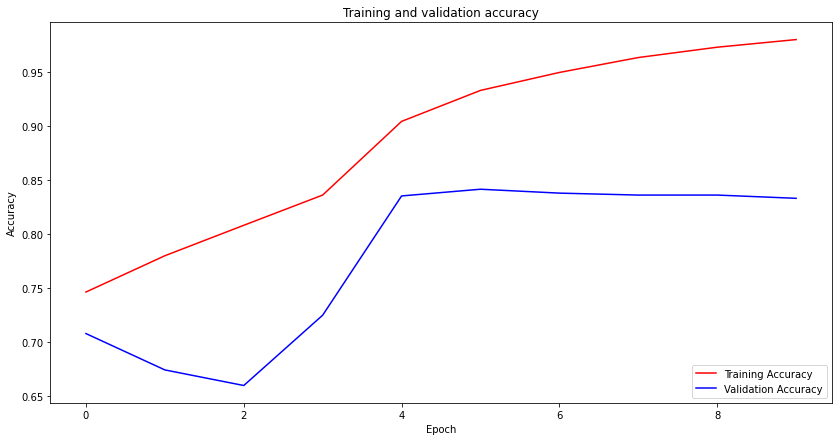

In [ ]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

### Gráficos de erro

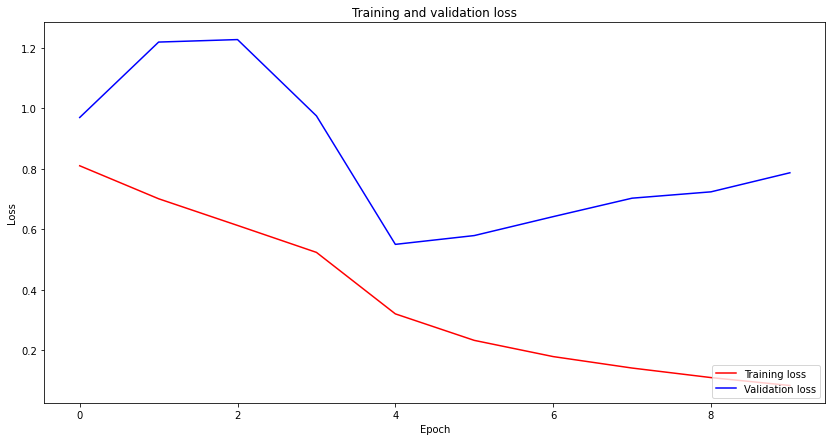

In [ ]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc='lower right')
plt.show()

### Classification report

In [ ]:
y_pred = [ np.argmax(pred) for pred in final_model.predict(X_test) ]

313/313 [==============================] - 6s 13ms/step


In [ ]:
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.84      0.84      0.84      1000
  automobile       0.91      0.91      0.91      1000
        bird       0.81      0.74      0.77      1000
         cat       0.64      0.68      0.66      1000
        deer       0.79      0.82      0.81      1000
         dog       0.71      0.71      0.71      1000
        frog       0.87      0.87      0.87      1000
       horse       0.88      0.85      0.87      1000
        ship       0.91      0.89      0.90      1000
       truck       0.89      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



### Matriz de confusão

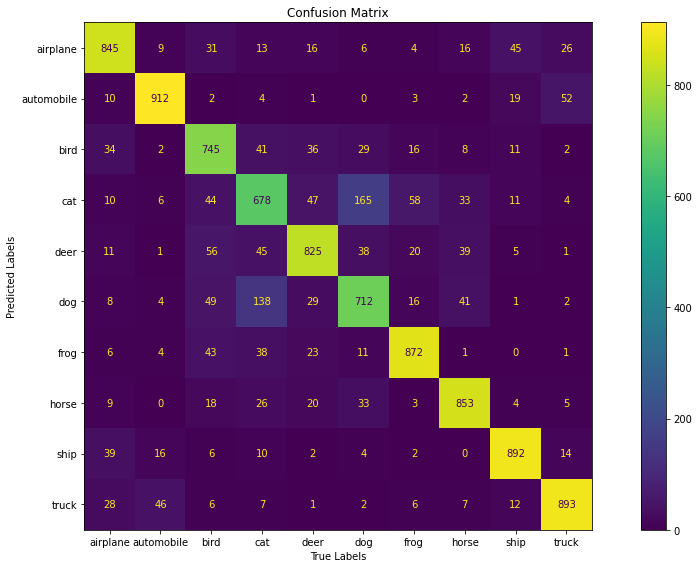

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);

plt.tight_layout()
plt.show()

# Questão 4

Utilize a rede neural perceptron de múltiplas camadas do tipo NARX (rede recorrente) 
para fazer a predição de um passo $x^{(n+1)}$ da série temporal 
$x(n) = 1 + cos(n + cos^2(n))$, sendo $n=0,1,2,3,...$ Gere inicialmente um conjunto de amostras para o treinamento, definindo o 
erro de predição como $e^{(n+1)}=x(n+1)-x^{(n+1)}$. Avalie o desempenho mostrando a curva a 
série temporal, a curva de predição o e curva do erro de predição

## Bibliotecas

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

## Gerando os dados

In [35]:
def func(n):
  result = 1 + np.cos(n + np.cos(n)**2)
  return result

In [36]:
x = np.linspace(0, 100, 1000)
y = func(x)

## Plotando os dados gerados

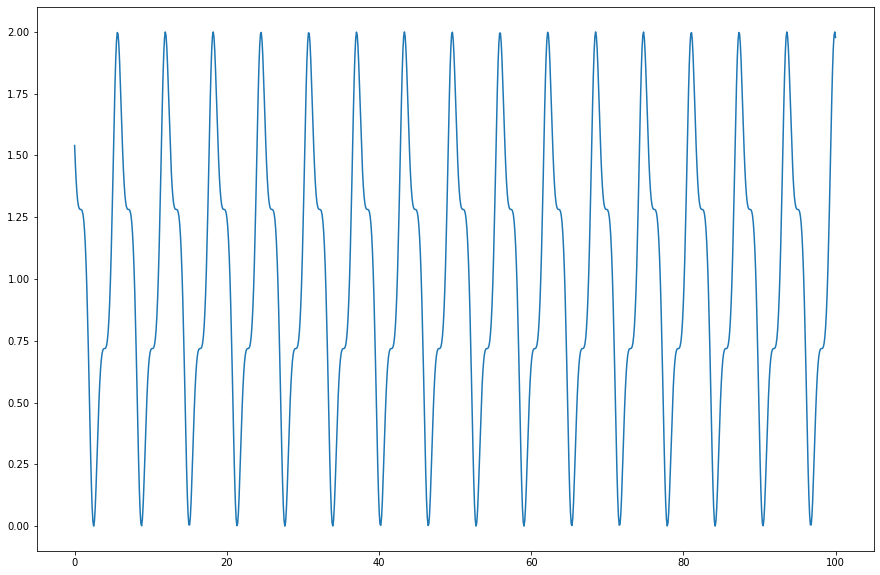

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x, y)

plt.show()

## Separando dados de treino e teste

In [38]:
X_train = x[:800]
y_train = y[:800]
X_test = x[800:]
y_test = y[800:]
print(f'Shape X_train = {X_train.shape}')
print(f'Shape y_train = {y_train.shape}')
print(f'Shape X_test = {X_test.shape}')
print(f'Shape y_test = {y_test.shape}')

Shape X_train = (800,)
Shape y_train = (800,)
Shape X_test = (200,)
Shape y_test = (200,)


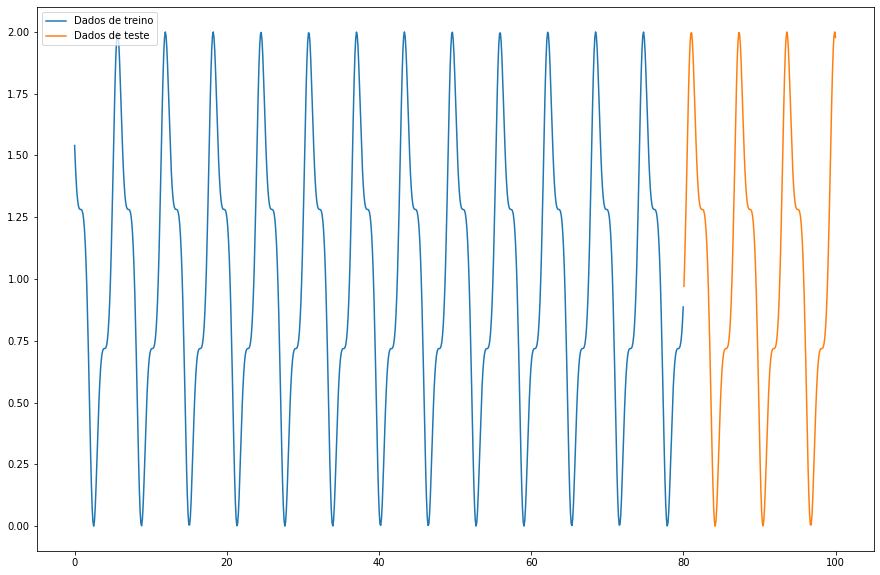

In [39]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(X_train, y_train, label='Dados de treino')
ax.plot(X_test, y_test, label='Dados de teste')

ax.legend()

plt.show()

## Organizando os dados de treino

In [40]:
sequence_x = list(TimeseriesGenerator(X_train, X_train, 3, batch_size=1))
sequence_y = list(TimeseriesGenerator(X_train[3:], X_train[3:], 1, batch_size=1))

train_seqs = []
y_train = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(3,), next_seq.reshape(1, ))
    
    train_seqs.append(seq)
    y_train.append(next_x)

train_seqs = np.array(train_seqs)
y_train = np.array(y_train)

In [41]:
sequence_x = list(TimeseriesGenerator(X_test, X_test, 3, batch_size=1))
sequence_y = list(TimeseriesGenerator(X_test[3:], X_test[3:], 1, batch_size=1))

test_seqs = []
y_test = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(3,), next_seq.reshape(1, ))
    
    test_seqs.append(seq)
    y_test.append(next_x)

test_seqs = np.array(test_seqs)
y_test = np.array(y_test)

## Arquitetura da rede recorrente

In [42]:
model = Sequential([
    LSTM(128, input_shape=(4, 1), return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='linear')
])

model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 128)            66560     
                                                                 
 lstm_4 (LSTM)               (None, 4, 64)             49408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable params: 0
_________________________________________________________________


## Treinamento da rede

In [ ]:
history = model.fit(
    train_seqs, y_train,
    validation_split=0.1,
    epochs=350,
    shuffle=True,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

## Curva do erro

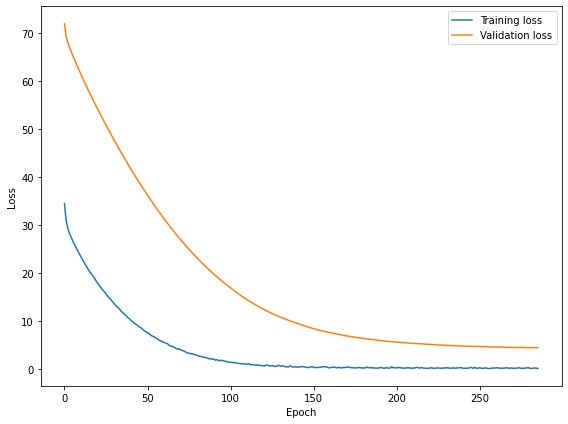

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')

ax.legend()
ax.set(
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

## Cálculo do erro de predição

In [45]:
y_pred = model.predict(test_seqs)


7/7 [==============================] - 1s 4ms/step


In [ ]:
erro = y_test - y_pred
erro

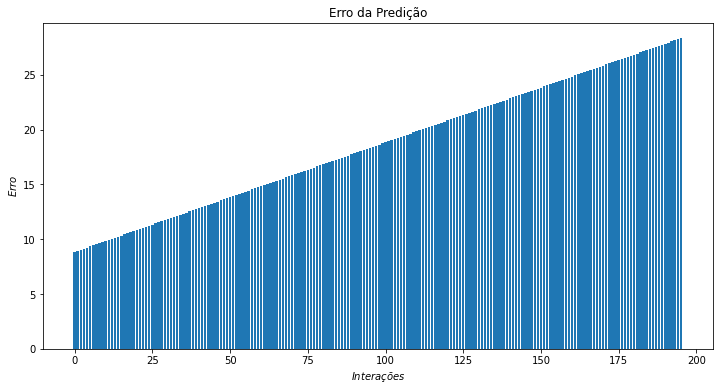

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    x=range(len(erro)),
    height=erro.flatten()
)

ax.set(
    title='Erro da Predição',
    ylabel='$Erro$',
    xlabel='$Interações$'
)
plt.show()

# Questão 5

 Considere quatro distribuições gaussianas, C1, C2, C3, e C4, em um espaço de entrada de dimensionalidade igual a oito, isto é $\vec{x} = (x_1, x_2,..., x_8)^t$. Todas as nuvens de dados formadas têm variâncias unitária, mas centros ou vetores média são diferentes e dados por $m_1 = (0, 0, 0, 0, 0, 0, 0, 0)^t$, $m_2 = (4, 0, 0, 0, 0, 0, 0, 0)^t$, $m_3 = (0, 0, 0, 4, 0, 0, 0, 0)^t$, $m_4 = (0, 0, 0, 0, 0, 0, 0, 4)^t$.

Utilize uma rede de autoeconders para reduzir a dimensionalidade dos dados para duas dimensões. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2. Esboce os dados neste novo espaço.

### Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import tensorflow as tf

### Gerando os dados

In [ ]:
variancia = np.eye(8)

num_l1 = np.random.multivariate_normal([0,0,0,0,0,0,0,0], variancia, 15000)
num_l2 = np.random.multivariate_normal([4,0,0,0,0,0,0,0], variancia, 15000)
num_l3 = np.random.multivariate_normal([0,0,0,4,0,0,0,0], variancia, 15000)
num_l4 = np.random.multivariate_normal([0,0,0,0,0,0,0,4], variancia, 15000) 

### Organizando o dataframe

In [ ]:
df1 = pd.DataFrame(num_l1, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'])
df2 = pd.DataFrame(num_l2, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'])
df3 = pd.DataFrame(num_l3, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'])
df4 = pd.DataFrame(num_l4, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'])

df = pd.concat([df1, df2, df3, df4])
df

V1        V2        V3        V4        V5        V6        V7  \
0     -0.713346 -1.558118 -1.527531 -0.022038  0.142831 -1.232397  0.306961   
1      0.511147 -0.440409  1.077915  2.546386  1.795226  0.076531 -0.945768   
2      0.786847 -0.852670 -0.373079  1.997516  0.253798  0.899672 -1.512006   
3      0.014563  1.812275  0.412397 -1.659886  0.266498  0.708146 -0.511912   
4     -0.410679  2.088507 -0.185701 -1.046112 -0.315552 -0.640052 -0.976185   
...         ...       ...       ...       ...       ...       ...       ...   
14995 -0.927965 -1.219710 -0.736606  2.073358  1.345602 -0.150142  0.768635   
14996  0.490201  0.795363 -0.200400  1.027779 -4.012671  1.111730  2.113721   
14997  2.104813 -0.880925  0.902552 -1.418390  0.250438 -0.774923 -0.032368   
14998 -1.090081  1.421559  0.752983  1.092650 -1.252420  0.732219 -1.411726   
14999 -0.677249  1.042322 -0.212438 -0.304745  0.083443  0.070732 -0.268215   

             V8  
0     -0.065261  
1     -1.412052  
2     -0.783216  
3      2.260958  
4     -0.200054  
...         ...  
14995  3.490603  
14996  4.778590  
14997  3.504511  
14998  3.270429  
14999  3.893869  

[60000 rows x 8 columns]

### Montando a rede autoencoder

In [ ]:
input_size = Input(shape=(8,))

encoder = Dense(8, activation='leaky_relu')(input_size)
encoder = Dense(4, activation='leaky_relu')(encoder)
encoder = Dense(2, activation='leaky_relu')(encoder)
decoder = Dense(4, activation='leaky_relu')(encoder)
decoder = Dense(8, activation='leaky_relu')(decoder)

model_autoencoder = Model(input_size, decoder)
model_encoder = Model(input_size, encoder)

### Treinando a rede

In [ ]:
model_autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
)

model_autoencoder.fit(df1, df1, epochs=50, validation_split=0.1, shuffle=True)
model_autoencoder.fit(df2, df2, epochs=50, validation_split=0.1, shuffle=True)
model_autoencoder.fit(df3, df3, epochs=50, validation_split=0.1, shuffle=True)
model_autoencoder.fit(df4, df4, epochs=50, validation_split=0.1, shuffle=True)

### Predições

In [ ]:
encoder_1 = model_encoder.predict(df1)
encoder_2 = model_encoder.predict(df2)
encoder_3 = model_encoder.predict(df3)
encoder_4 = model_encoder.predict(df4)
# encoder = model_encoder.predict(df)

### Visualizando em 2D

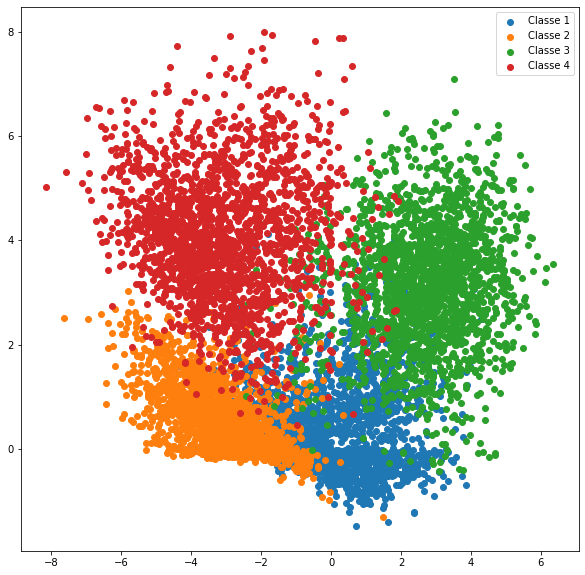

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(encoder_1[:, 0][0:2000], encoder_1[:, 1][0:2000], label='Classe 1')
ax.scatter(encoder_2[:, 0][0:2000], encoder_2[:, 1][0:2000], label='Classe 2')
ax.scatter(encoder_3[:, 0][0:2000], encoder_3[:, 1][0:2000], label='Classe 3')
ax.scatter(encoder_4[:, 0][0:2000], encoder_4[:, 1][0:2000], label='Classe 4')

ax.legend()
plt.show()

# Questão 6

Pesquise sobre redes neurais recorrentes LSTM. Apresente neste estudo aplicações das LSTM deep learning. Seguem abaixo sugestões de aplicações.


1.   Predição de series temporais (exemplo: predição de palavras no texto, ou predição de ações na bolsa de valores, etc.)

2.    Reconhecimento de voz
3.    Processamento de Linguagem Natural
4.    Outra aplicações de livre escolha



Referências

[Pesquisa sobre LSTM](https://medium.com/@web2ajax/redes-neurais-recorrentes-lstm-b90b720dc3f6)

[Aplicação - Redes LSTM em predição de séries temporais - Precipitação mês a mês](https://www.kaggle.com/code/abhishekmamidi/time-series-analysis-lstm)

As redes neurais recorrentes (RNN) são as redes que permitem ser aplicadas para resolver problemas que envolvem séries temporais, ou seja, em que o raciocínio de eventos anteriores é importante para prever eventos posteriores. 

Dessa forma, a RNN é uma rede em loop, que permite que as informações persistam, e esse loop pode ser imaginado como várias cópias da mesma rede, passando a mensagem para um sucessor.

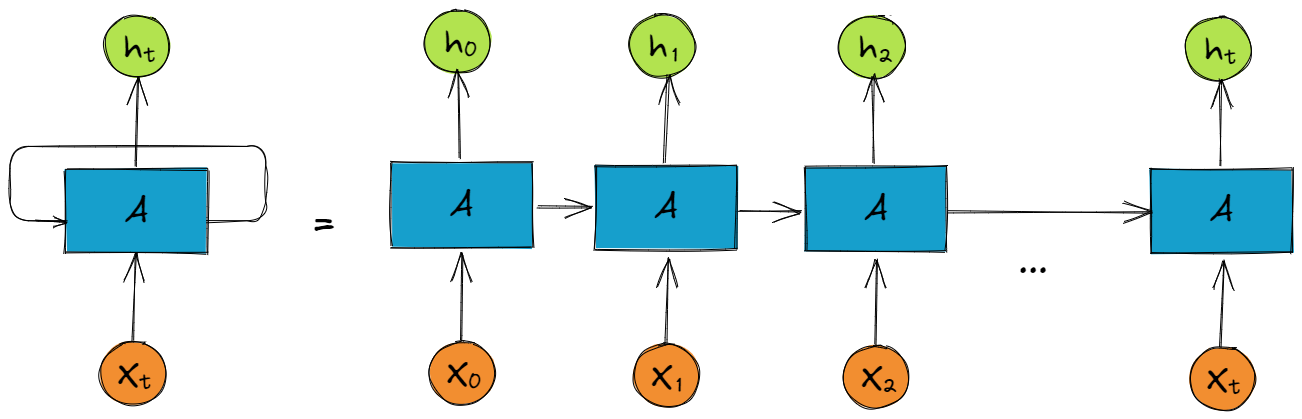

Entretanto, em situações com textos muito grandes ou que haja dependências de longo prazo, à medida que as informações aumentam, as RNN se tornam incapazes de aprender e conectar essas informações.

Para isso, foram criadas as LSTM, também chamadas de Redes de Memória de Curto Longo Prazo, e estas são capazes de aprender dependências de longo prazo. O que diferencia as RNNs das LSTMs é o módulo de repetição delas, em que as RNNs possuem uma única camada neste módulo, enquanto as LSTMs possuem 4 camadas conectadas de maneira bem pensada.

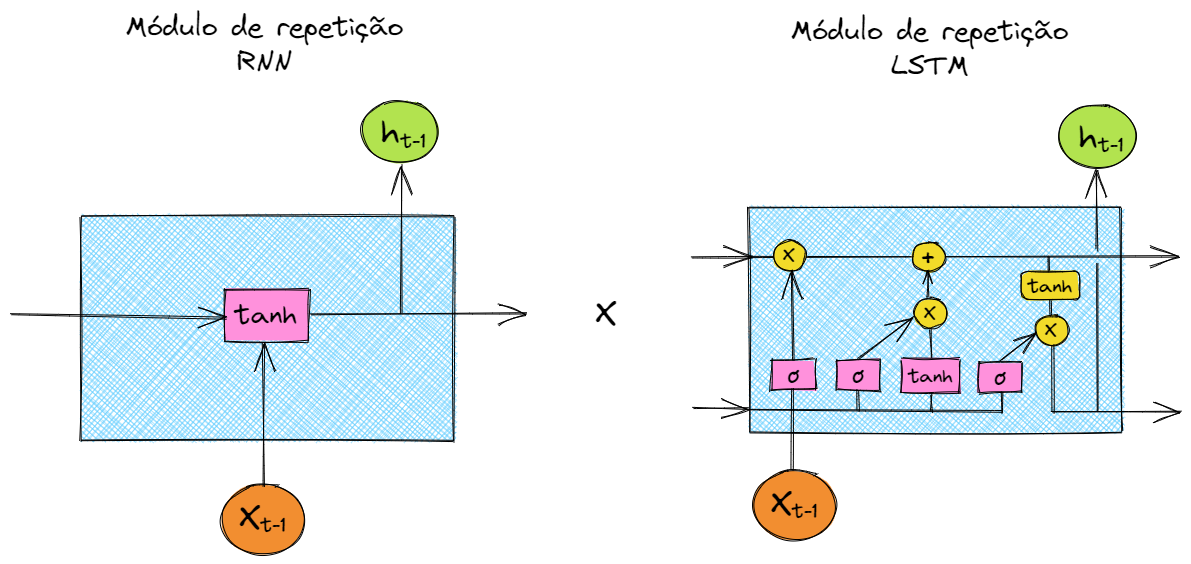

Para esta pesquisa, utilizou-se a aplicação das LSTM na predição de precipitações em uma cidade na Índia. Assim, foram recolhidos os valores de precipitação (em mm) de todos os meses entre 1972 e 2002 na cidade indiana, e o objetivo é fazer predições para os próximos meses.

# Questão 7

Apresente um estudo sobre transferência de conhecimento (transfer learning) no contexto de deep learning. 

Referências:

[Tutorial transfer learning](https://medium.com/ensina-aitutorial-transfer-learning-3972cac5e9b5)

[Transfer Learning With Keras](https://chroniclesofai.com/transfer-learning-with-keras-resnet-50/)

O _transfer learning_, em português, transferência de aprendizado, é uma técnica utilizada que consiste na reutilização de um modelo pré-treinado para resolver outro problema. Ou seja, inicialmente, houve a construção e o treinamento de uma rede neural com outro conjunto de dados, geralmente bem extenso, e agora essa mesma rede será utilizada para resolver um novo problema.

Em geral, a técnica do _transfer learning_ é muito utilizada por dois motivos:

*   Em muitas situações, é difícil obter um conjunto de dados de um maior tamanho para fazer o treinamento, então utilizando o _transfer learning_, podemos fazer o treinamento para um menor conjunto de dados;
*   Algumas redes neurais, como as CNN, por exemplo, são muito caras para serem treinadas, além de demorar bastante tempo. Dessa forma, utilizar um modelo complexo já treinado para outra aplicação irá poupar tempo e dinheiro.

Dessa forma, o fluxograma abaixo apresenta a lógica utilizada na técnica _transfer learning_:

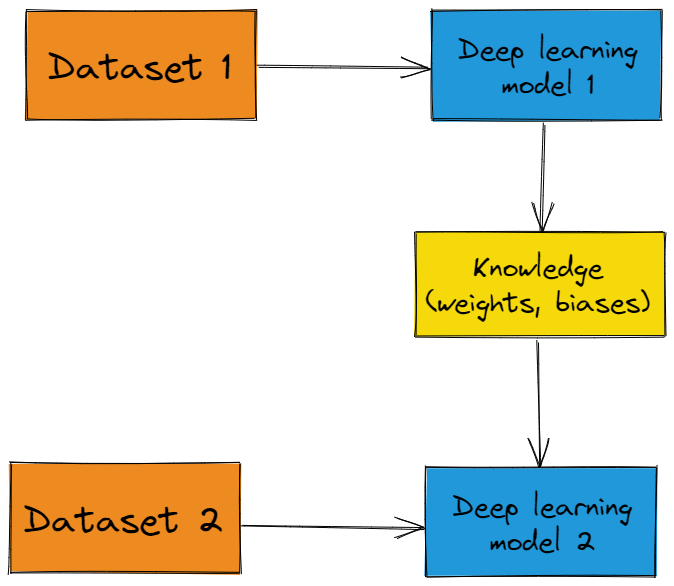

Vale ressaltar que essa técnica deve ser utilizada em aplicações que possuam alguma similaridade. Por exemplo, pode-se utilizar o _transfer learning_ pegando qualquer rede neural treinada para realizar a classificação de imagens para fazer a identificação de uma face, visto que nesse cenário, as aplicações possuem certa similaridade, tanto nas features quanto nos pesos.
